<a href="https://colab.research.google.com/github/Sajad-Adil/Time-Series-Classification-using-Machine-Learning-on-EEG-Data/blob/main/EEG_Signal_Classification_(Binary_Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tsfresh

####Import libraries

In [ ]:
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm, feature_selection, model_selection, pipeline, preprocessing, metrics, datasets, neighbors, tree, ensemble, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn import pipeline
from tsfresh import extract_features, select_features, extract_relevant_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import EfficientFCParameters, MinimalFCParameters
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, load_robot_execution_failures


#### Unzip dataset

In [ ]:
zip_path = '/content/BonnDataset.zip'
extract_dir = '/content/Bonn_data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

##Automated (Loading, pre-processing, and feature extraction)



### Load the Dataset



In [ ]:
def read_txt_files_to_df(folder_path):

    records = []


    for filename in os.listdir(folder_path):
        if filename.endswith('.txt') or filename.endswith('.TXT'):
            file_path = os.path.join(folder_path, filename)

            with open(file_path, 'r') as file:
                content = file.readlines()

                samples = [float(line.strip()) for line in content]
                if len(samples) == 4097:
                    records.append(samples)
                else:
                    print(f"File {filename} does not contain exactly 4097 samples. Skipping this file.")

    # Create a DataFrame from the list of records
    df = pd.DataFrame(records)

    return df



In [ ]:


df0 = read_txt_files_to_df('/content/Bonn_data/Z') # set A
df0['class'] = 0
df1 = read_txt_files_to_df('/content/Bonn_data/O') # set B

df1['class'] = 0
df2 = read_txt_files_to_df('/content/Bonn_data/N') # set C
df2['class'] = 0
df3 = read_txt_files_to_df('/content/Bonn_data/F') # set D
df3['class'] = 0
df4 = read_txt_files_to_df('/content/Bonn_data/S') # set E
df4['class'] = 1


In [ ]:
df0 = pd.concat([df0, df1], axis=0)
df1 = pd.concat([df2, df3], axis=0)
df2 = pd.concat([df4], axis=0)

In [ ]:
combined_data = pd.concat([df0, df1, df2], axis=0)

In [ ]:
combined_data.reset_index(drop=True, inplace=True)


In [ ]:
combined_data

,0,1,2,3,4,5,6,7,8,9,...,4088,4089,4090,4091,4092,4093,4094,4095,4096,class
0,-13.0,-4.0,2.0,21.0,25.0,26.0,11.0,6.0,4.0,3.0,...,-14.0,4.0,39.0,70.0,75.0,81.0,74.0,61.0,-5.0,0
1,-45.0,-105.0,-106.0,-54.0,-17.0,14.0,36.0,36.0,14.0,-13.0,...,10.0,8.0,13.0,15.0,26.0,26.0,22.0,5.0,96.0,0
2,14.0,26.0,32.0,25.0,16.0,8.0,8.0,12.0,11.0,19.0,...,-19.0,-29.0,-35.0,-51.0,-55.0,-58.0,-32.0,-6.0,-17.0,0
3,-87.0,-89.0,-73.0,-69.0,-51.0,-48.0,-51.0,-47.0,-30.0,-6.0,...,-21.0,-22.0,-15.0,9.0,32.0,37.0,18.0,7.0,7.0,0
4,-8.0,-19.0,-32.0,-40.0,-55.0,-60.0,-60.0,-59.0,-46.0,-25.0,...,-34.0,10.0,52.0,71.0,65.0,40.0,27.0,41.0,-21.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.0,-47.0,-100.0,-192.0,-252.0,-277.0,-268.0,-216.0,-153.0,-111.0,...,235.0,253.0,209.0,142.0,102.0,82.0,77.0,78.0,-320.0,1
496,59.0,37.0,25.0,18.0,16.0,17.0,19.0,23.0,17.0,19.0,...,161.0,265.0,397.0,510.0,569.0,501.0,366.0,199.0,-224.0,1
497,475.0,501.0,477.0,403.0,303.0,186.0,87.0,43.0,79.0,181.0,...,293.0,235.0,163.0,125.0,109.0,95.0,103.0,136.0,55.0,1
498,-88.0,-115.0,-140.0,-159.0,-164.0,-161.0,-144.0,-123.0,-93.0,-59.0,...,180.0,165.0,156.0,156.0,153.0,150.0,146.0,140.0,191.0,1


In [ ]:
combined_data.shape

(500, 4098)

In [ ]:
y = combined_data['class']
y.unique()


array([0, 1])

In [ ]:
y.shape

(500,)

In [ ]:
# copy the combined data
data = combined_data.copy()

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,...,4088,4089,4090,4091,4092,4093,4094,4095,4096,class
0,-13.0,-4.0,2.0,21.0,25.0,26.0,11.0,6.0,4.0,3.0,...,-14.0,4.0,39.0,70.0,75.0,81.0,74.0,61.0,-5.0,0
1,-45.0,-105.0,-106.0,-54.0,-17.0,14.0,36.0,36.0,14.0,-13.0,...,10.0,8.0,13.0,15.0,26.0,26.0,22.0,5.0,96.0,0
2,14.0,26.0,32.0,25.0,16.0,8.0,8.0,12.0,11.0,19.0,...,-19.0,-29.0,-35.0,-51.0,-55.0,-58.0,-32.0,-6.0,-17.0,0
3,-87.0,-89.0,-73.0,-69.0,-51.0,-48.0,-51.0,-47.0,-30.0,-6.0,...,-21.0,-22.0,-15.0,9.0,32.0,37.0,18.0,7.0,7.0,0
4,-8.0,-19.0,-32.0,-40.0,-55.0,-60.0,-60.0,-59.0,-46.0,-25.0,...,-34.0,10.0,52.0,71.0,65.0,40.0,27.0,41.0,-21.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.0,-47.0,-100.0,-192.0,-252.0,-277.0,-268.0,-216.0,-153.0,-111.0,...,235.0,253.0,209.0,142.0,102.0,82.0,77.0,78.0,-320.0,1
496,59.0,37.0,25.0,18.0,16.0,17.0,19.0,23.0,17.0,19.0,...,161.0,265.0,397.0,510.0,569.0,501.0,366.0,199.0,-224.0,1
497,475.0,501.0,477.0,403.0,303.0,186.0,87.0,43.0,79.0,181.0,...,293.0,235.0,163.0,125.0,109.0,95.0,103.0,136.0,55.0,1
498,-88.0,-115.0,-140.0,-159.0,-164.0,-161.0,-144.0,-123.0,-93.0,-59.0,...,180.0,165.0,156.0,156.0,153.0,150.0,146.0,140.0,191.0,1


### Convert into appropriate format

In [ ]:
data["id"] = data.index
data = data.drop(['class'], axis=1)
data = data.melt(id_vars='id', var_name="time").sort_values(['id', 'time']).reset_index(drop=True)

In [ ]:
data

,id,time,value
0,0,0,-13.0
1,0,1,-4.0
2,0,2,2.0
3,0,3,21.0
4,0,4,25.0
...,...,...,...
2048495,499,4092,301.0
2048496,499,4093,475.0
2048497,499,4094,356.0
2048498,499,4095,87.0


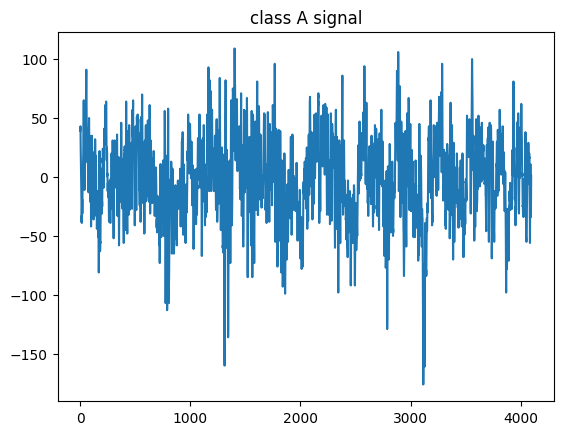

In [ ]:
from matplotlib import pyplot as plt

plt.title('class A signal')
plt.plot(data[data['id'] == 10].set_index('time').value)
plt.show()

###Feature extraction


In [ ]:
EEG_features = extract_features(data, column_id="id", column_sort="time", default_fc_parameters=EfficientFCParameters())

Feature Extraction: 100%|██████████| 500/500 [06:42<00:00,  1.24it/s]


In [ ]:
impute(EEG_features)

/usr/local/lib/python3.10/dist-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['value__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


,value__variance_larger_than_standard_deviation,value__has_duplicate_max,value__has_duplicate_min,value__has_duplicate,value__sum_values,value__abs_energy,value__mean_abs_change,value__mean_change,value__mean_second_derivative_central,value__median,...,value__fourier_entropy__bins_5,value__fourier_entropy__bins_10,value__fourier_entropy__bins_100,value__permutation_entropy__dimension_3__tau_1,value__permutation_entropy__dimension_4__tau_1,value__permutation_entropy__dimension_5__tau_1,value__permutation_entropy__dimension_6__tau_1,value__permutation_entropy__dimension_7__tau_1,value__query_similarity_count__query_None__threshold_0.0,value__mean_n_absolute_max__number_of_maxima_7
0,1.0,0.0,0.0,1.0,17166.0,8.706488e+06,12.189941,0.001953,-0.009158,6.0,...,0.368845,0.636919,1.564907,1.507724,2.448868,3.470313,4.525890,5.547563,0.0,160.000000
1,1.0,0.0,0.0,1.0,14313.0,9.152653e+06,11.850342,0.034424,0.018437,4.0,...,0.299054,0.621665,1.402128,1.478233,2.396210,3.399291,4.447869,5.471347,0.0,161.857143
2,1.0,0.0,0.0,1.0,-73743.0,9.590945e+06,12.908447,-0.007568,-0.002808,-18.0,...,0.280179,0.642733,1.487273,1.511387,2.465714,3.507436,4.582769,5.624532,0.0,175.857143
3,1.0,0.0,0.0,1.0,-113991.0,1.147638e+07,12.874512,0.022949,0.000244,-28.0,...,0.559059,0.744514,1.742006,1.444371,2.314637,3.272488,4.275224,5.270177,0.0,173.571429
4,1.0,0.0,0.0,1.0,33269.0,6.228785e+06,15.670166,-0.003174,-0.006227,8.0,...,0.837704,1.276726,2.033498,1.476237,2.341186,3.268438,4.271838,5.326868,0.0,149.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.0,0.0,0.0,1.0,-61487.0,1.538095e+08,52.852295,-0.078369,-0.042735,-30.0,...,0.204871,0.352599,1.219765,1.200779,1.775441,2.396971,3.049735,3.710171,0.0,530.285714
496,1.0,0.0,0.0,1.0,-255973.0,1.524108e+08,30.071533,-0.069092,-0.048962,-65.0,...,0.159721,0.239211,1.216587,1.253411,1.900048,2.597271,3.313387,4.027067,0.0,728.142857
497,1.0,0.0,0.0,1.0,117468.0,8.973239e+08,133.295898,-0.102539,-0.013065,18.0,...,0.731788,1.043432,1.843317,1.244482,1.864829,2.535933,3.257893,4.019134,0.0,1491.428571
498,1.0,0.0,0.0,1.0,-23766.0,6.540926e+07,26.414307,0.068115,0.009524,-16.0,...,0.296956,0.536077,1.231209,1.233241,1.848059,2.518004,3.229821,3.952198,0.0,401.000000


In [ ]:
# check for null values
EEG_features.isnull().sum().sum()

0

### Feature selection using tsfresh

In [ ]:
selected_features = select_features(EEG_features, y)

In [ ]:
selected_features.shape

(500, 281)

In [ ]:
y.shape

(500,)

Data Normalization

In [ ]:
scalar= preprocessing.StandardScaler()
xnorm = scalar.fit_transform(selected_features)

##Modeling

### Data split using K fold cross validation

In [ ]:
stratified_shuffled_k_fold = model_selection.StratifiedShuffleSplit(
    n_splits=10, random_state = 42
)

In [ ]:
def kfold_train_test_split(x,y,train_indices,test_indices):
    return x[train_indices], x[test_indices], y[train_indices], y[test_indices]


A function for model evaluation

In [ ]:
def evaluate_model(x, y, model):
  scores = []

  for train_indices, test_indices in stratified_shuffled_k_fold.split(x, y):
    x_train, x_test, y_train, y_test = kfold_train_test_split(x, y, train_indices, test_indices)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
          # Calculate scores
    accuracy = metrics.accuracy_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred,average='weighted')
    precision = metrics.precision_score(y_test, y_pred,average='weighted')
    recall = metrics.recall_score(y_test, y_pred,average='weighted')
      # Create scores dictionary
    scores_dict = {"accuracy": accuracy,"f1": f1, "precision": precision, "recall": recall}
    cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
      # Append to scores array
    scores.append(scores_dict)
  scores_df = pd.DataFrame(scores)


  return scores_df.mean(), scores_df


In [ ]:
xnorm.shape

###Logistic Regression

In [ ]:
logistic_regression=pipeline.Pipeline([
               ('logistic',linear_model.LogisticRegression())])

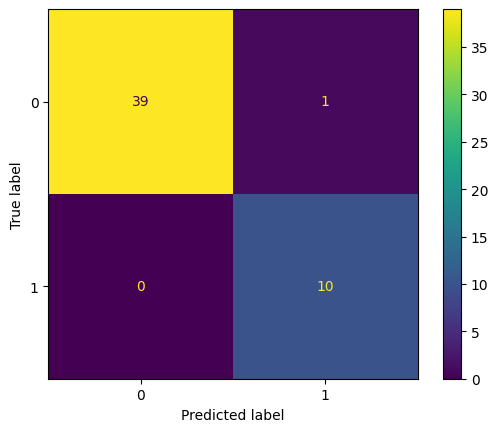

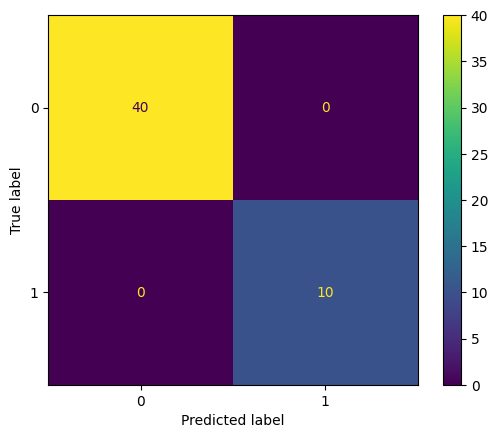

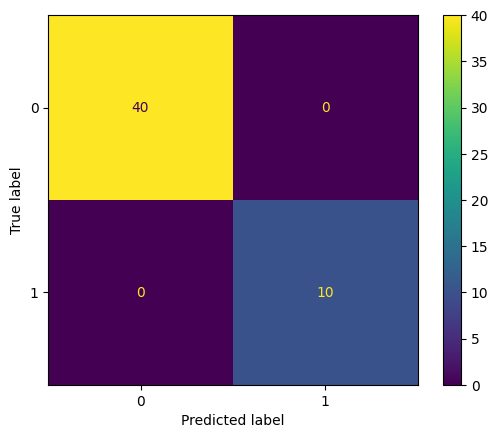

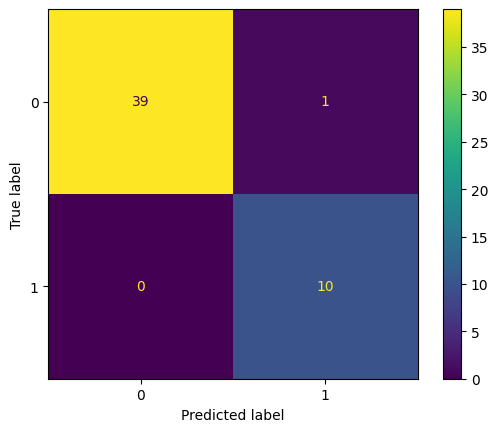

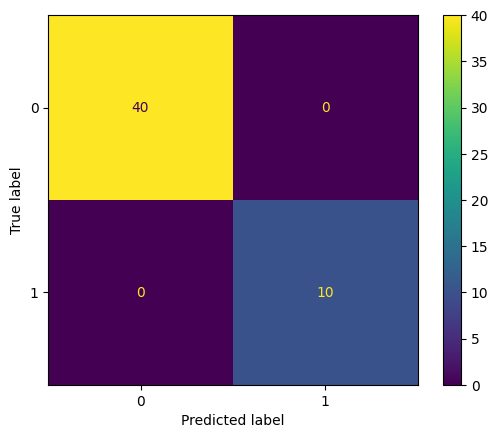

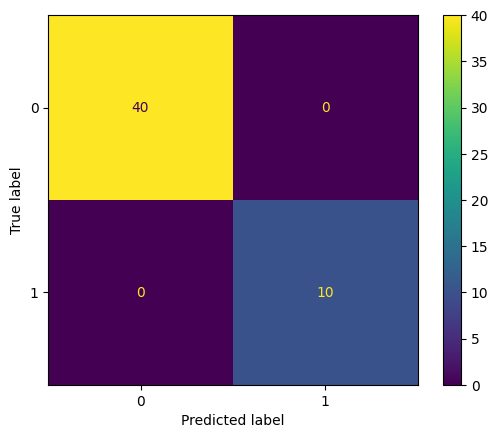

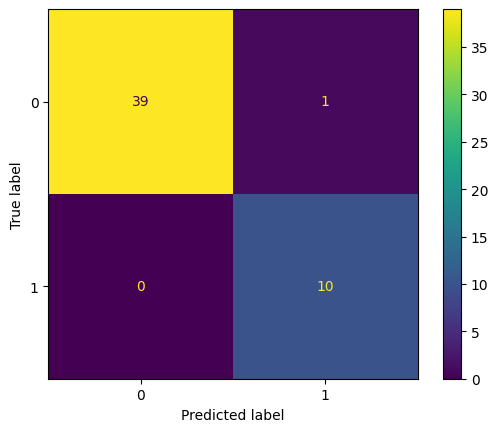

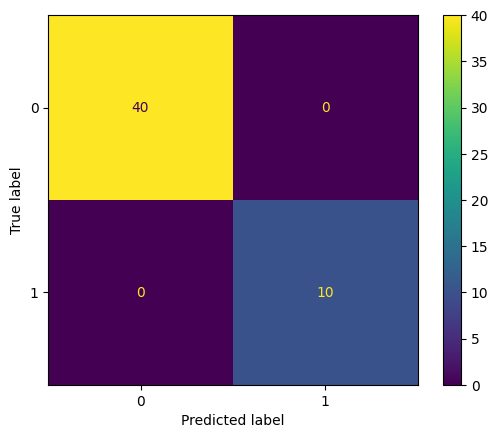

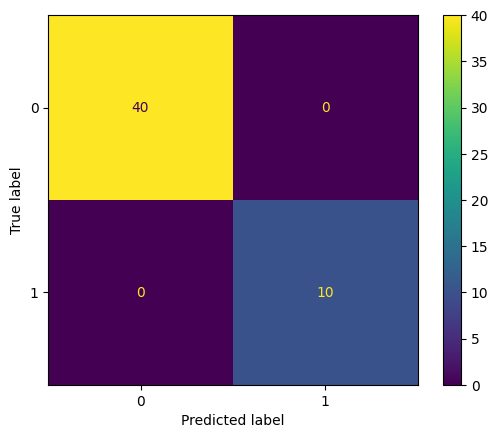

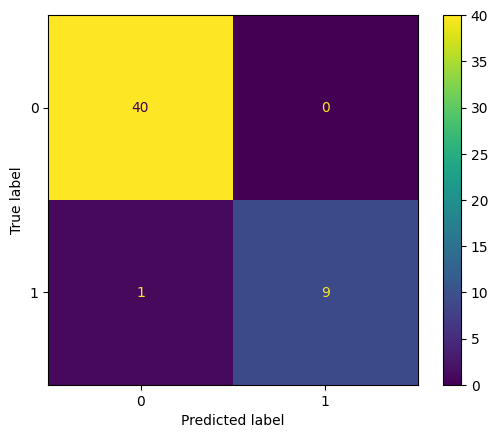

(accuracy     0.992000
 f1           0.992065
 precision    0.992594
 recall       0.992000
 dtype: float64,
    accuracy        f1  precision  recall
 0      0.98  0.980350   0.981818    0.98
 1      1.00  1.000000   1.000000    1.00
 2      1.00  1.000000   1.000000    1.00
 3      0.98  0.980350   0.981818    0.98
 4      1.00  1.000000   1.000000    1.00
 5      1.00  1.000000   1.000000    1.00
 6      0.98  0.980350   0.981818    0.98
 7      1.00  1.000000   1.000000    1.00
 8      1.00  1.000000   1.000000    1.00
 9      0.98  0.979597   0.980488    0.98)

In [ ]:
evaluate_model(xnorm , y, logistic_regression)

###KNN

In [ ]:
from sklearn import neighbors

In [ ]:
knn=pipeline.Pipeline([
               ('model',neighbors.KNeighborsClassifier(n_neighbors=5))])

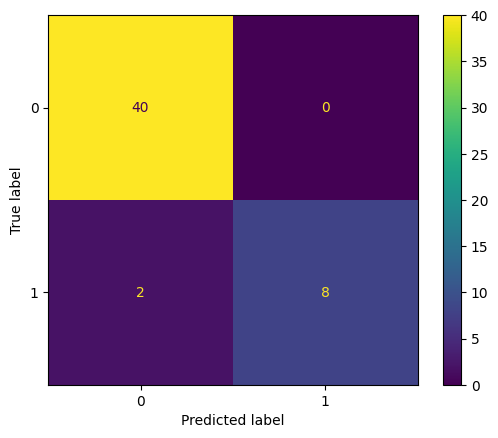

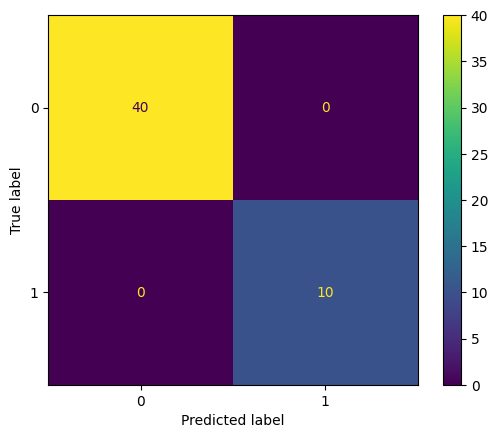

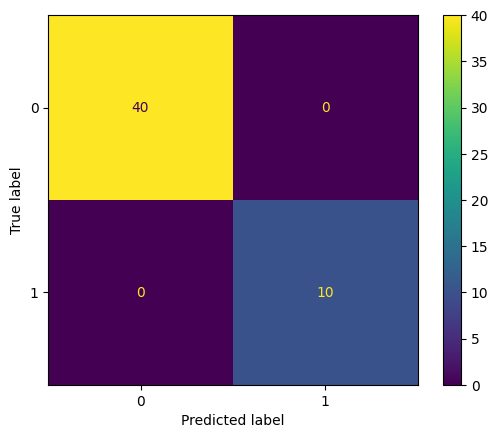

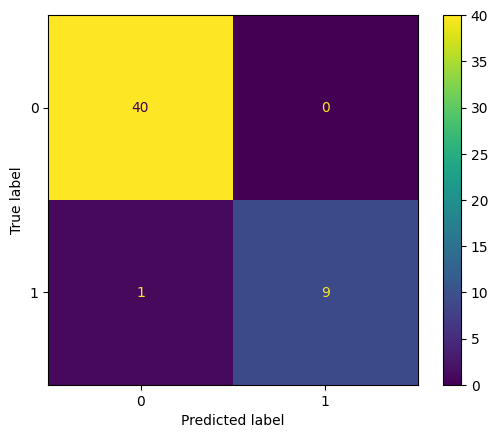

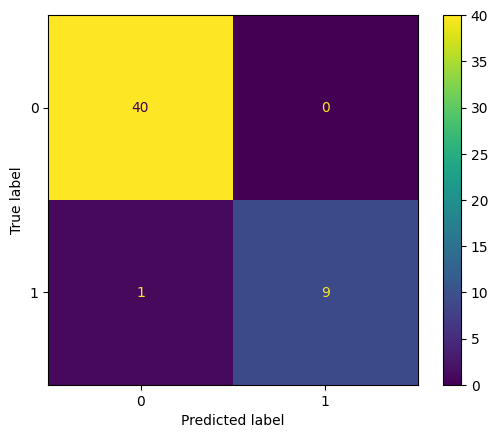

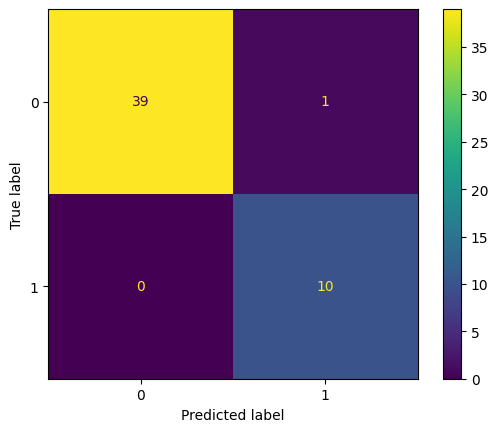

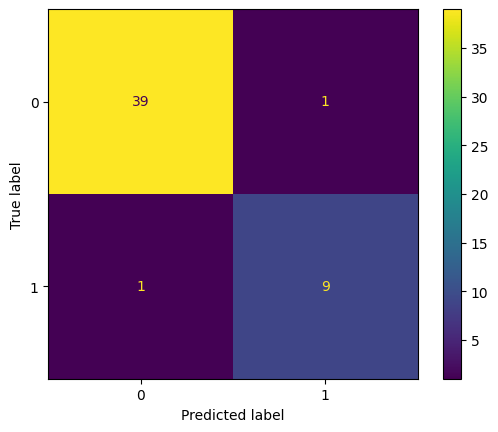

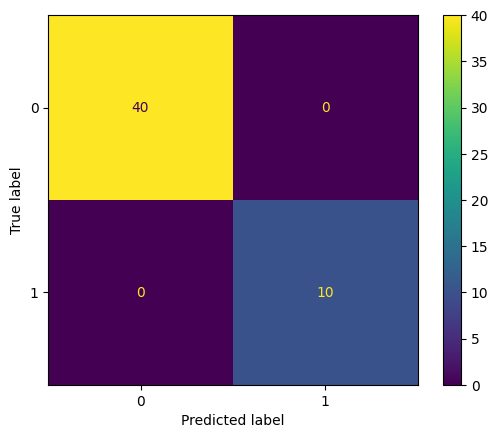

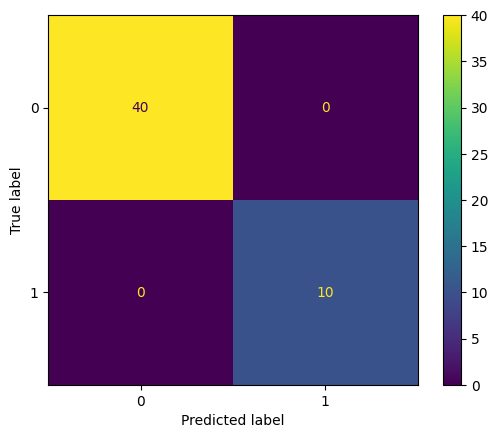

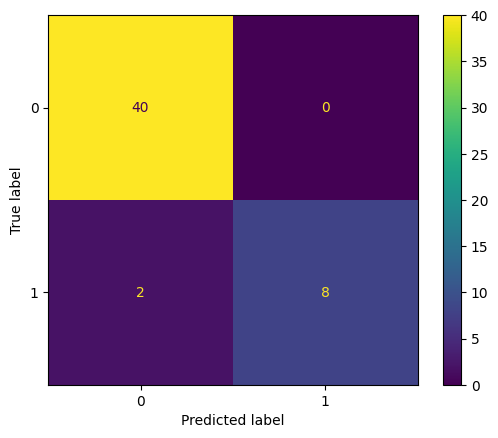

(accuracy     0.982000
 f1           0.981608
 precision    0.982660
 recall       0.982000
 dtype: float64,
    accuracy        f1  precision  recall
 0      0.96  0.958266   0.961905    0.96
 1      1.00  1.000000   1.000000    1.00
 2      1.00  1.000000   1.000000    1.00
 3      0.98  0.979597   0.980488    0.98
 4      0.98  0.979597   0.980488    0.98
 5      0.98  0.980350   0.981818    0.98
 6      0.96  0.960000   0.960000    0.96
 7      1.00  1.000000   1.000000    1.00
 8      1.00  1.000000   1.000000    1.00
 9      0.96  0.958266   0.961905    0.96)

In [ ]:
evaluate_model(xnorm, y, knn)

### KNN with bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(neighbors.KNeighborsClassifier()
                           )

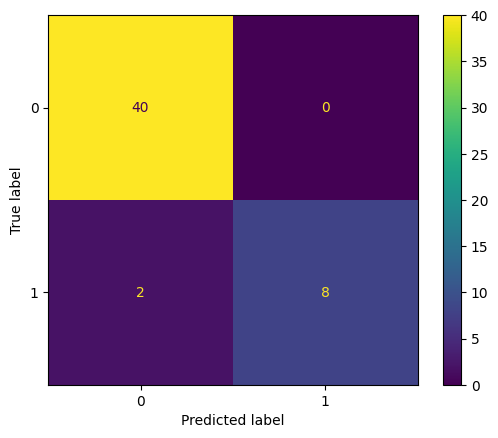

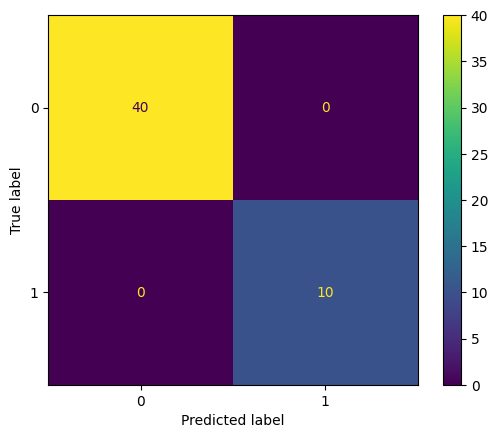

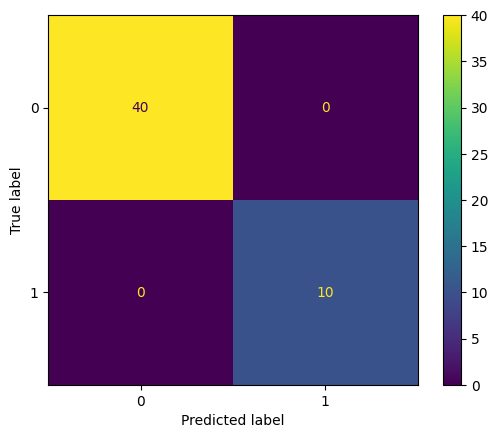

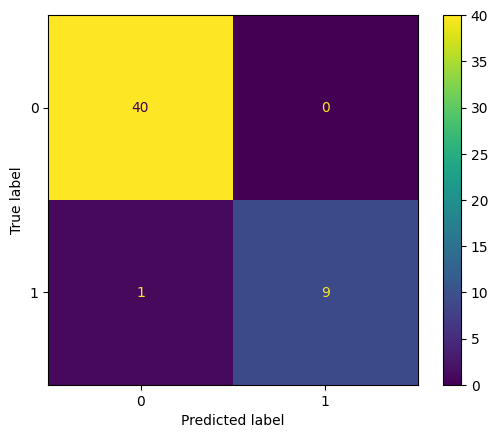

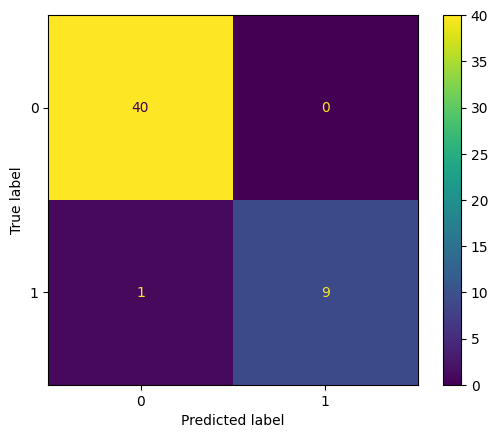

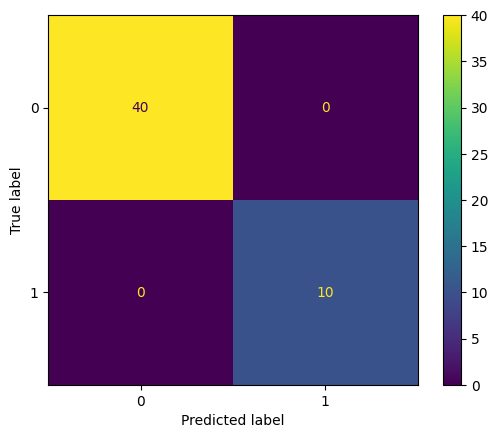

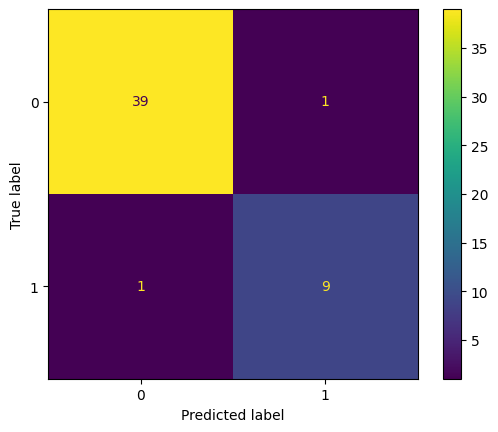

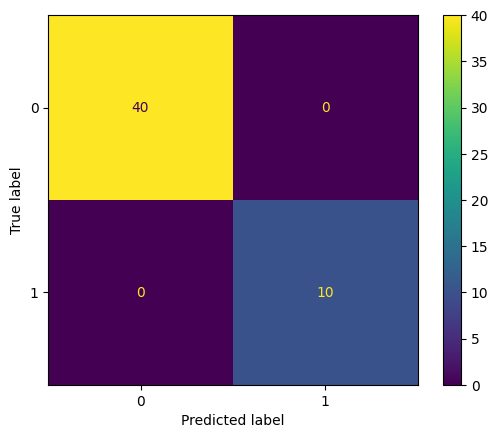

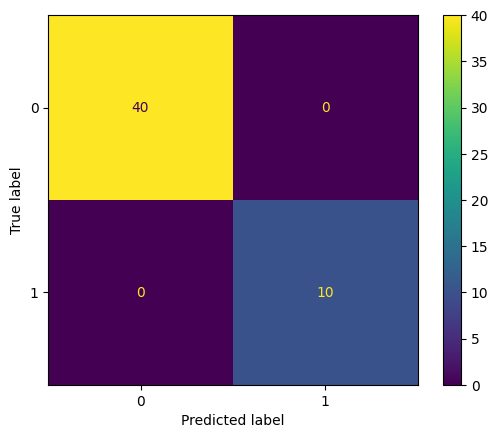

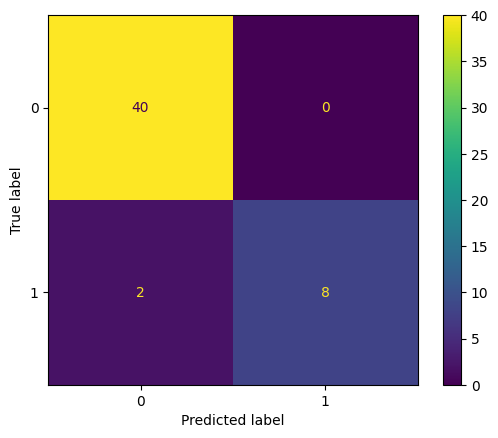

(accuracy     0.984000
 f1           0.983573
 precision    0.984479
 recall       0.984000
 dtype: float64,
    accuracy        f1  precision  recall
 0      0.96  0.958266   0.961905    0.96
 1      1.00  1.000000   1.000000    1.00
 2      1.00  1.000000   1.000000    1.00
 3      0.98  0.979597   0.980488    0.98
 4      0.98  0.979597   0.980488    0.98
 5      1.00  1.000000   1.000000    1.00
 6      0.96  0.960000   0.960000    0.96
 7      1.00  1.000000   1.000000    1.00
 8      1.00  1.000000   1.000000    1.00
 9      0.96  0.958266   0.961905    0.96)

In [ ]:
evaluate_model(xnorm, y, bagging)

###Decision Tree

In [ ]:
decision_tree = tree.DecisionTreeClassifier(criterion='entropy')

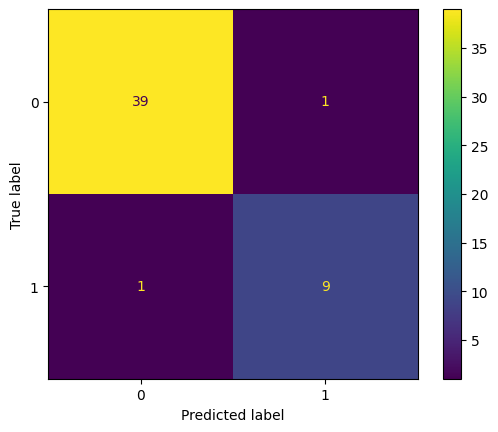

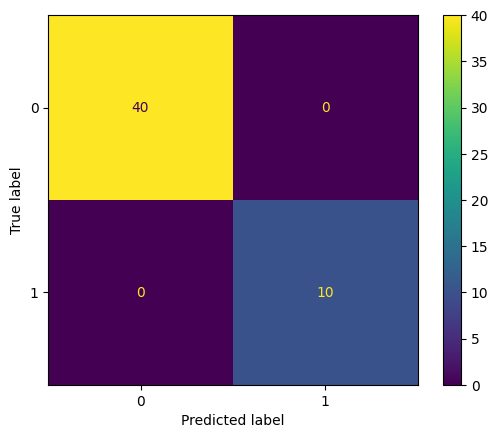

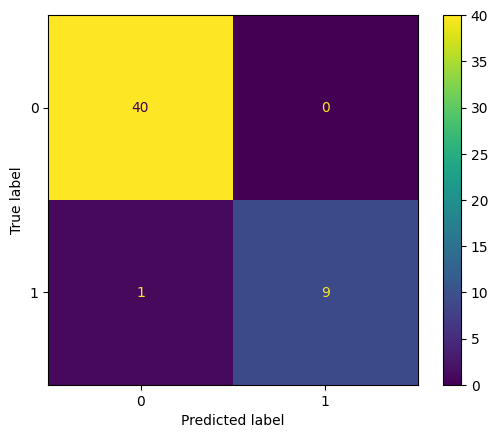

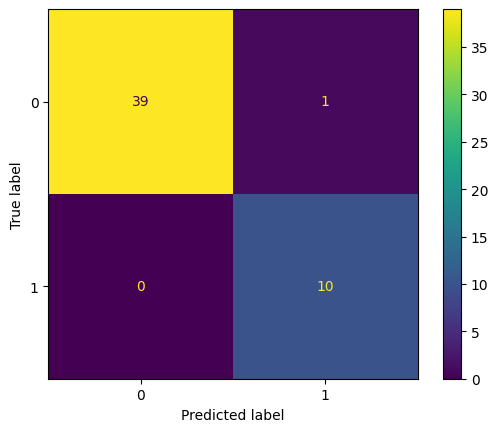

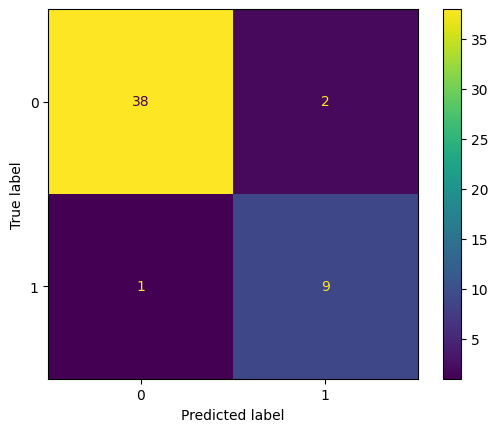

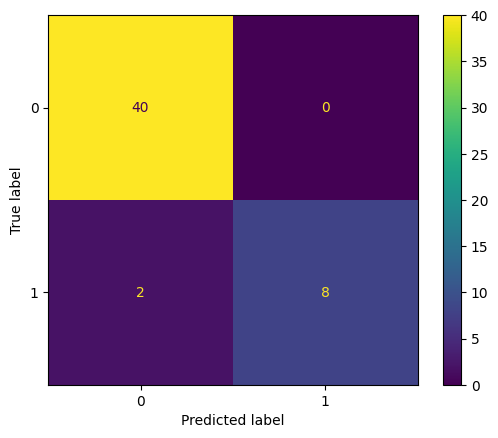

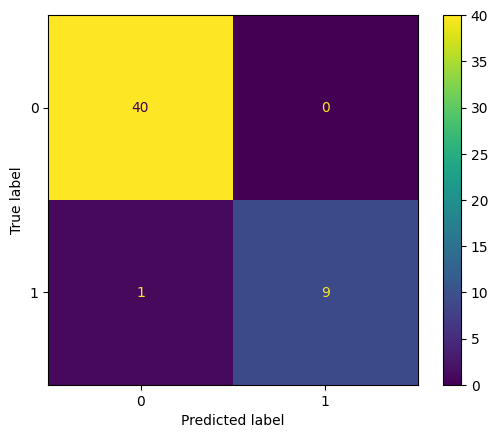

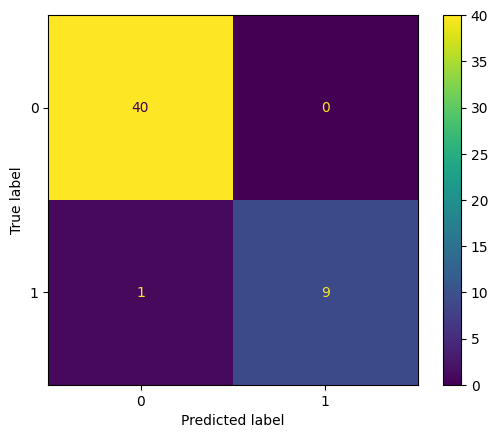

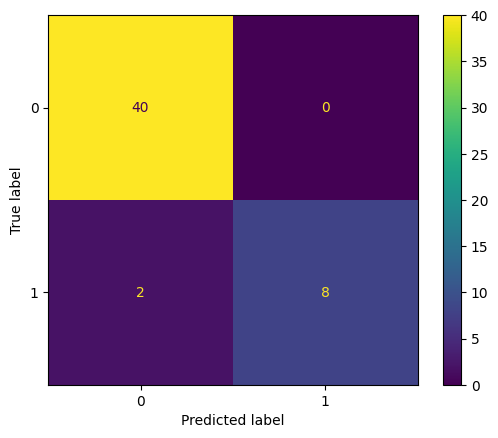

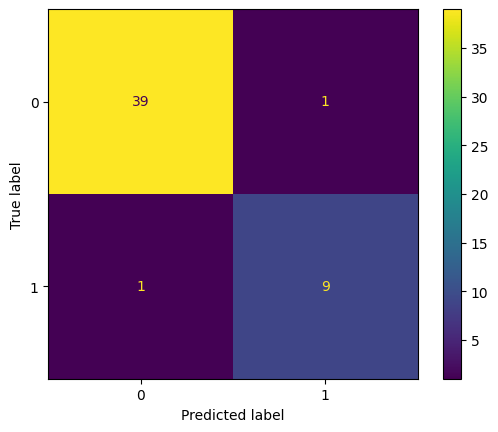

(accuracy     0.970000
 f1           0.969672
 precision    0.971021
 recall       0.970000
 dtype: float64,
    accuracy        f1  precision  recall
 0      0.96  0.960000   0.960000    0.96
 1      1.00  1.000000   1.000000    1.00
 2      0.98  0.979597   0.980488    0.98
 3      0.98  0.980350   0.981818    0.98
 4      0.94  0.941049   0.943124    0.94
 5      0.96  0.958266   0.961905    0.96
 6      0.98  0.979597   0.980488    0.98
 7      0.98  0.979597   0.980488    0.98
 8      0.96  0.958266   0.961905    0.96
 9      0.96  0.960000   0.960000    0.96)

In [ ]:
evaluate_model(xnorm, y, decision_tree)

###Random Forest

In [ ]:
rf=ensemble.RandomForestClassifier(n_estimators=200,criterion='entropy')

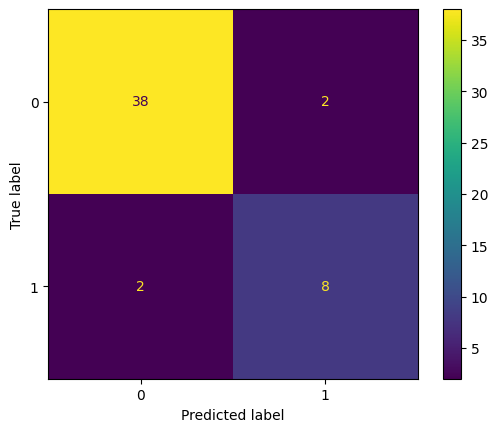

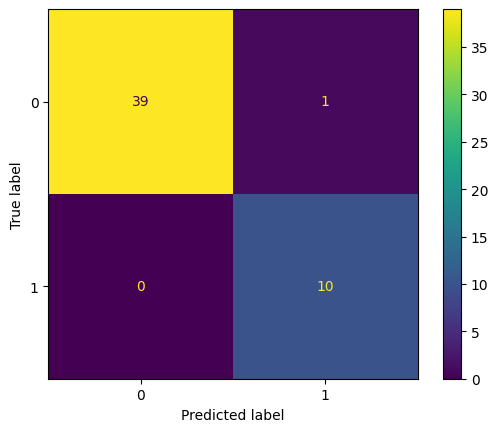

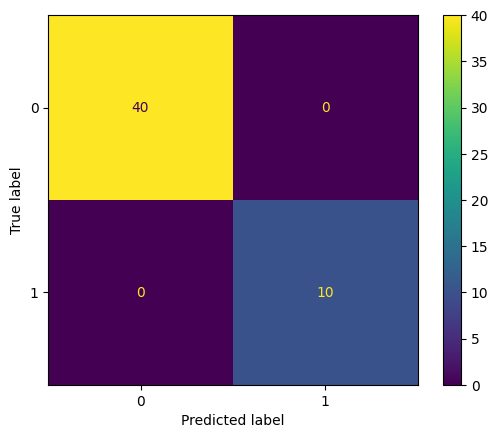

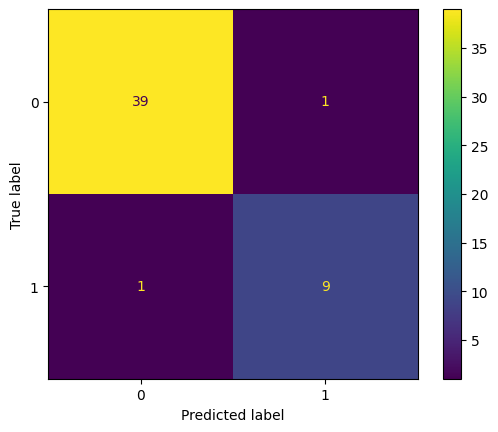

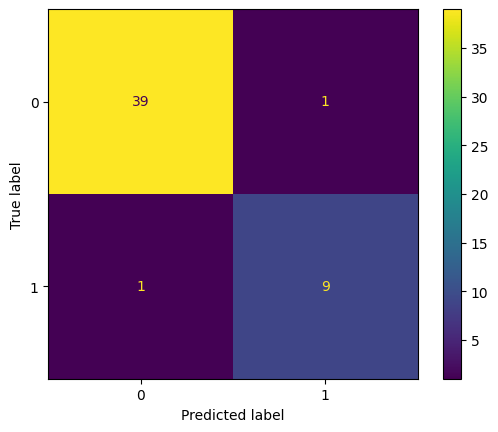

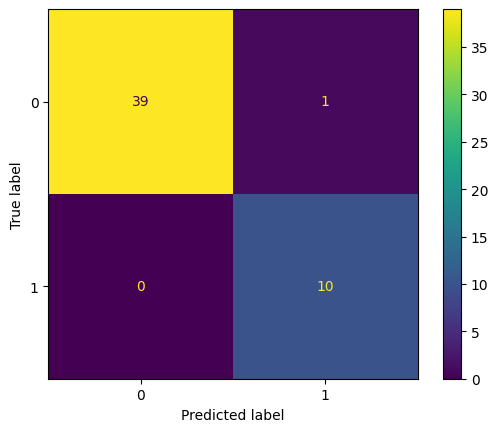

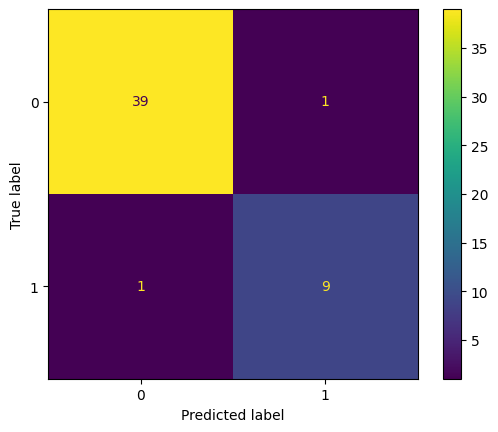

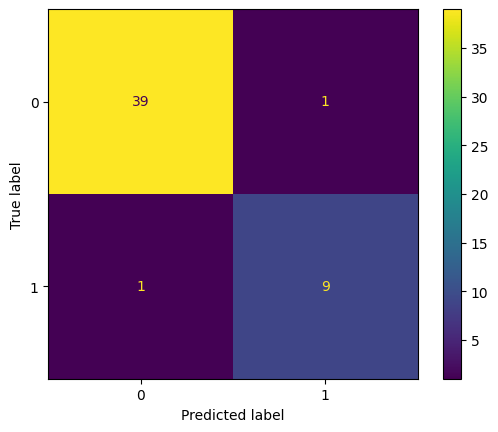

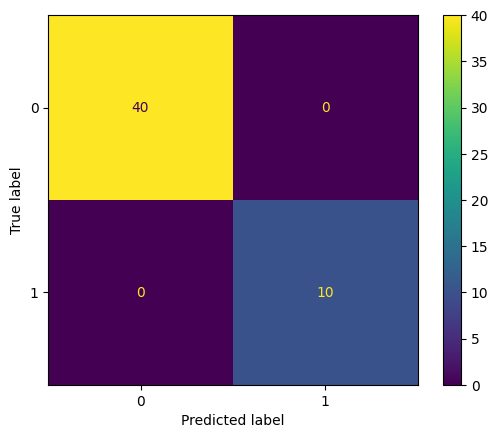

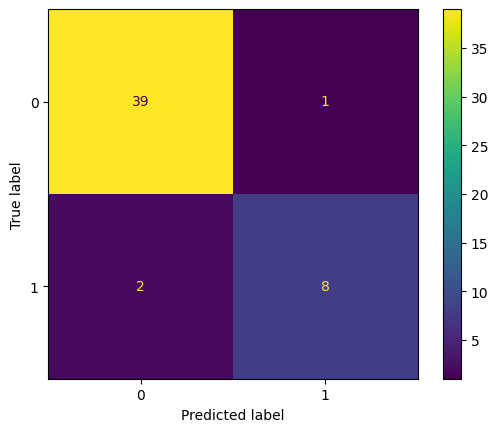

(accuracy     0.966000
 f1           0.965949
 precision    0.966239
 recall       0.966000
 dtype: float64,
    accuracy        f1  precision  recall
 0      0.92  0.920000   0.920000    0.92
 1      0.98  0.980350   0.981818    0.98
 2      1.00  1.000000   1.000000    1.00
 3      0.96  0.960000   0.960000    0.96
 4      0.96  0.960000   0.960000    0.96
 5      0.98  0.980350   0.981818    0.98
 6      0.96  0.960000   0.960000    0.96
 7      0.96  0.960000   0.960000    0.96
 8      1.00  1.000000   1.000000    1.00
 9      0.94  0.938791   0.938753    0.94)

In [ ]:
evaluate_model(xnorm, y, rf)

###SVM

In [ ]:
svc =pipeline.Pipeline([
               ('model' ,svm.SVC( kernel= 'linear'))])


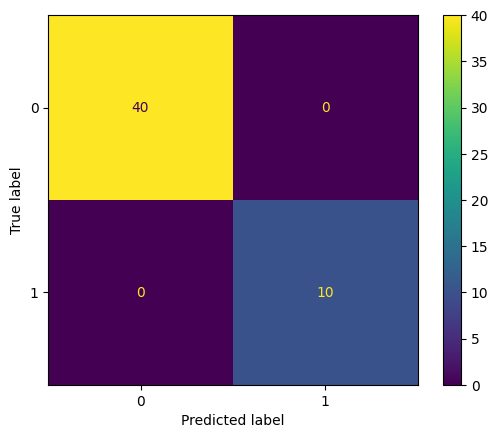

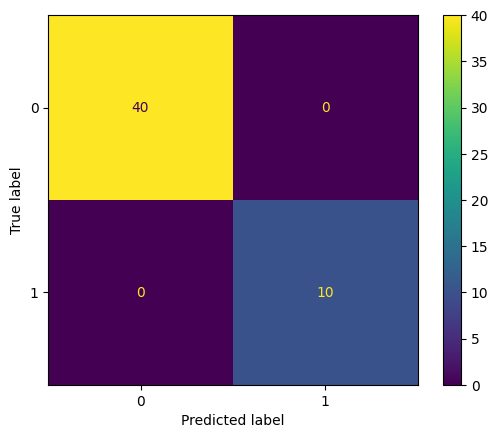

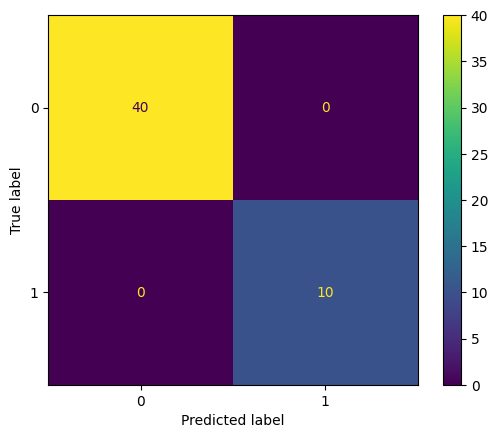

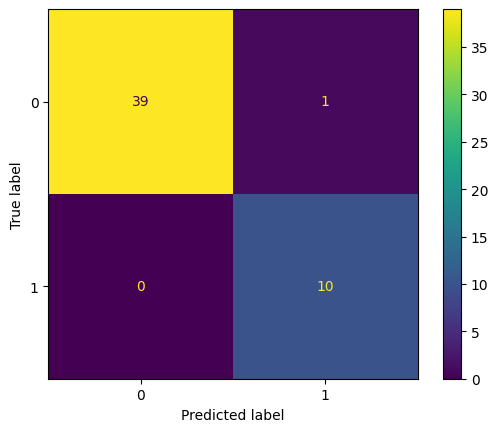

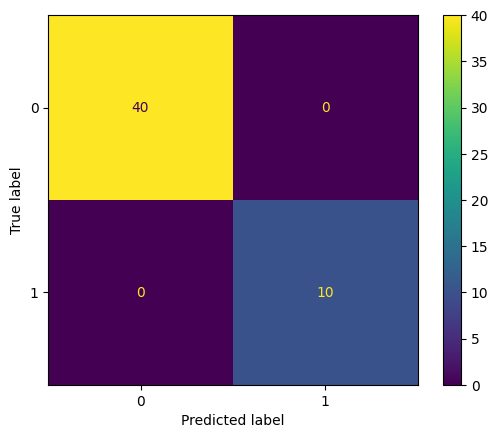

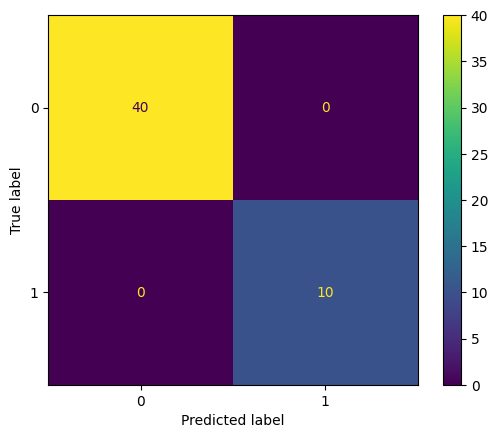

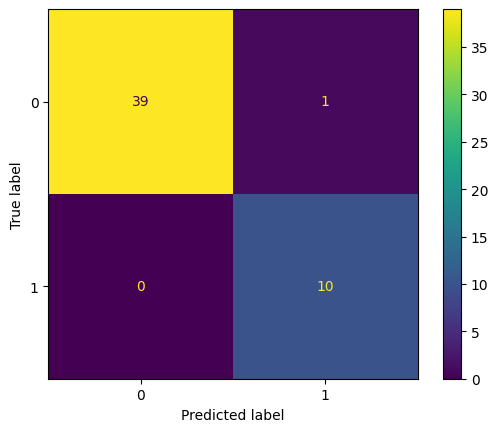

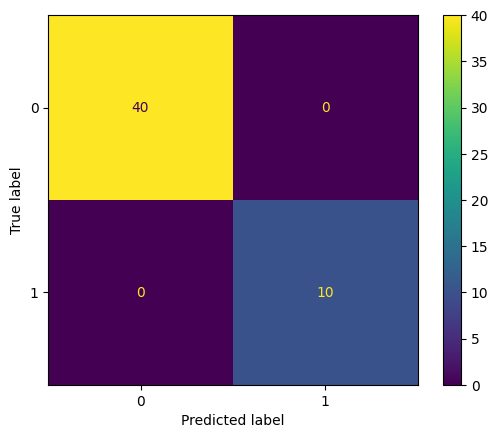

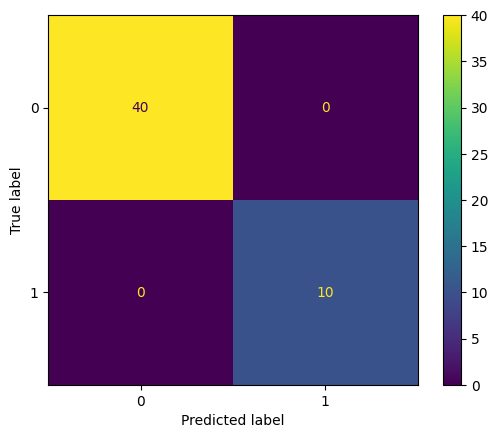

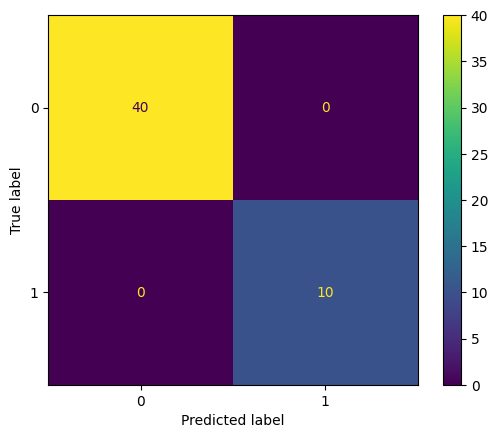

(accuracy     0.996000
 f1           0.996070
 precision    0.996364
 recall       0.996000
 dtype: float64,
    accuracy       f1  precision  recall
 0      1.00  1.00000   1.000000    1.00
 1      1.00  1.00000   1.000000    1.00
 2      1.00  1.00000   1.000000    1.00
 3      0.98  0.98035   0.981818    0.98
 4      1.00  1.00000   1.000000    1.00
 5      1.00  1.00000   1.000000    1.00
 6      0.98  0.98035   0.981818    0.98
 7      1.00  1.00000   1.000000    1.00
 8      1.00  1.00000   1.000000    1.00
 9      1.00  1.00000   1.000000    1.00)

In [ ]:
evaluate_model(xnorm, y, svc)

### Gradient Boosting

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier


In [ ]:
hgb = pipeline.Pipeline([
    ('model', HistGradientBoostingClassifier())
])

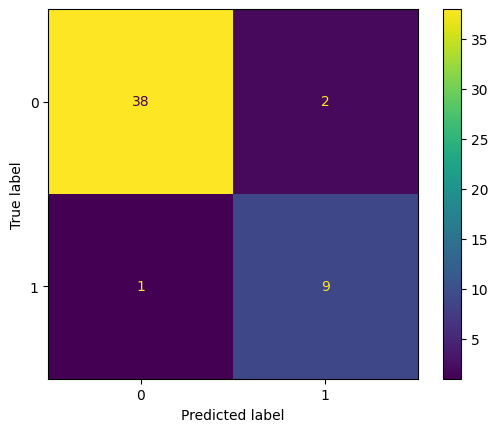

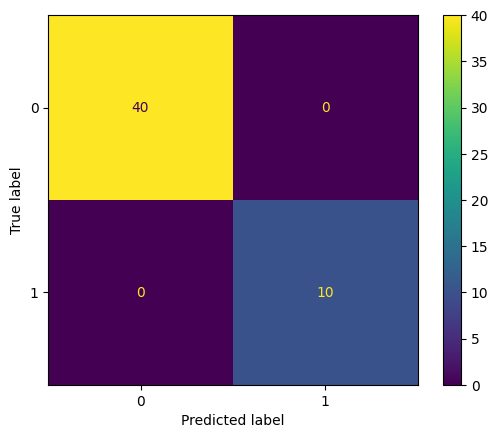

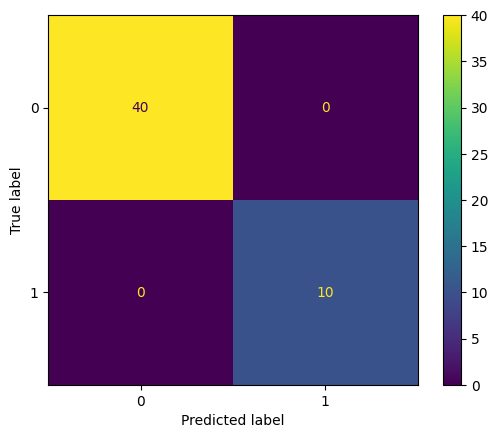

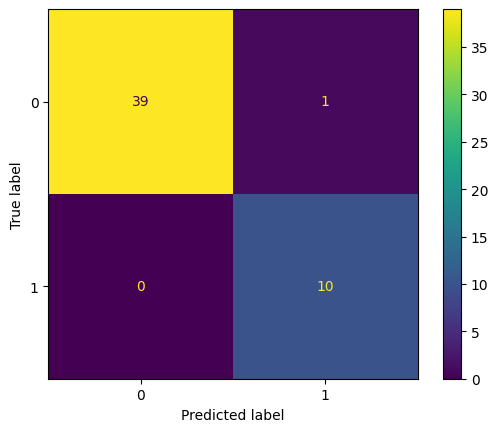

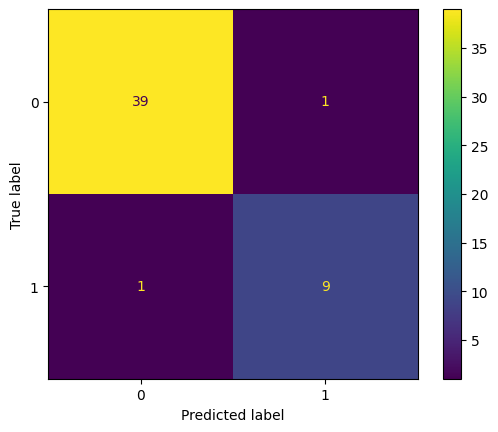

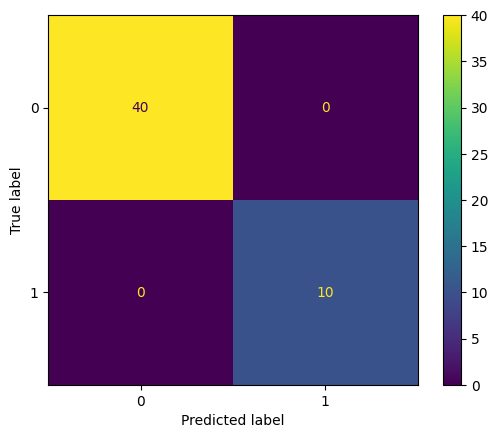

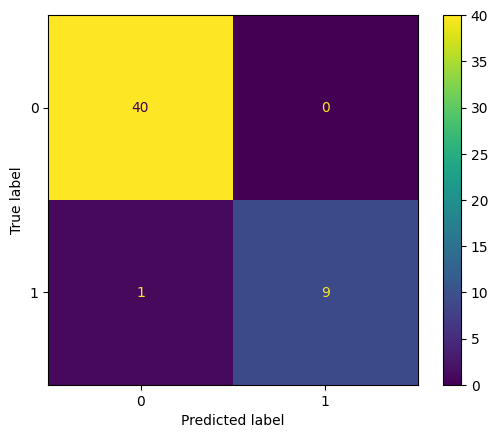

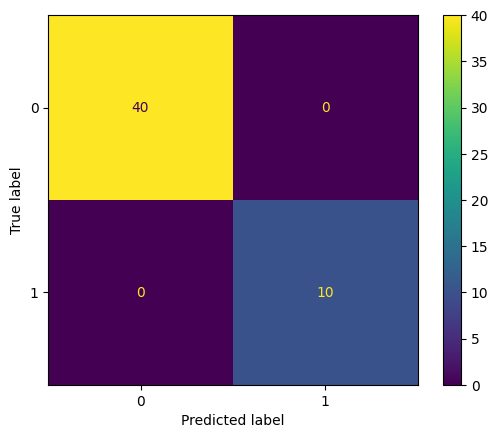

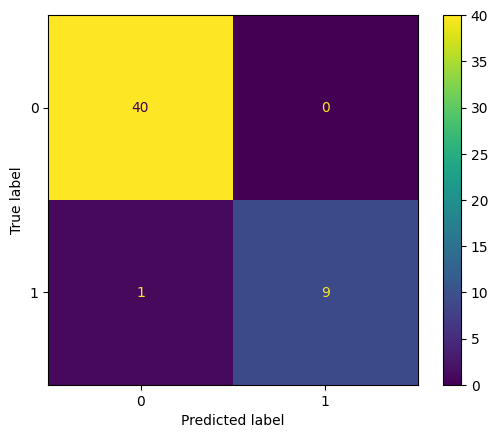

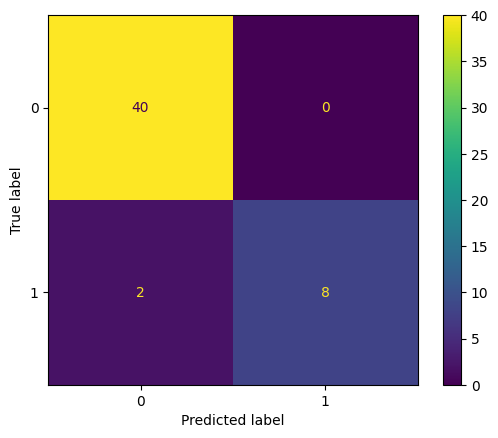

(accuracy     0.980000
 f1           0.979886
 precision    0.980782
 recall       0.980000
 dtype: float64,
    accuracy        f1  precision  recall
 0      0.94  0.941049   0.943124    0.94
 1      1.00  1.000000   1.000000    1.00
 2      1.00  1.000000   1.000000    1.00
 3      0.98  0.980350   0.981818    0.98
 4      0.96  0.960000   0.960000    0.96
 5      1.00  1.000000   1.000000    1.00
 6      0.98  0.979597   0.980488    0.98
 7      1.00  1.000000   1.000000    1.00
 8      0.98  0.979597   0.980488    0.98
 9      0.96  0.958266   0.961905    0.96)

In [ ]:
evaluate_model(xnorm, y, hgb)

## Hyperparameter tuning of the best model

In [ ]:
svc_model = svm.SVC()

In [ ]:

params = {
    "kernel": ["linear", "rbf"],
    "C": [0.1, 1, 10],
    "gamma": ["scale", "auto", 0.1, 1],
}

In [ ]:
scoring = {
    "accuracy": metrics.make_scorer(metrics.accuracy_score),
    "precision": metrics.make_scorer(metrics.precision_score),
    "recall": metrics.make_scorer(metrics.recall_score),
}

In [ ]:
kfold = model_selection.StratifiedShuffleSplit(10, random_state=42)

In [ ]:
gs = model_selection.GridSearchCV(
    svc_model, params, cv=kfold, scoring=scoring, refit="accuracy", verbose=2
)

In [ ]:

gs.fit(xnorm, y)


Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=sca

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defin

[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defin

[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defin

[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defin

[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ...................

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defin

[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defin

[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...................

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defin

[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defin

[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ...................

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defin

[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defin

[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...................

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defin

[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defin

[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=42, test_size=None,
            train_size=None),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto', 0.1, 1],
                         'kernel': ['linear', 'rbf']},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)},
             verbose=2)

In [ ]:

print("Best Hyperparameters:", gs.best_params_)
print("Best Score (Accuracy): ", gs.best_score_)

Best Hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Score (Recall):  0.9960000000000001


In [ ]:
svm_model= pipeline.Pipeline([
                                      ('model', svm.SVC(kernel='linear', C=0.1, gamma='scale',  random_state=42))])


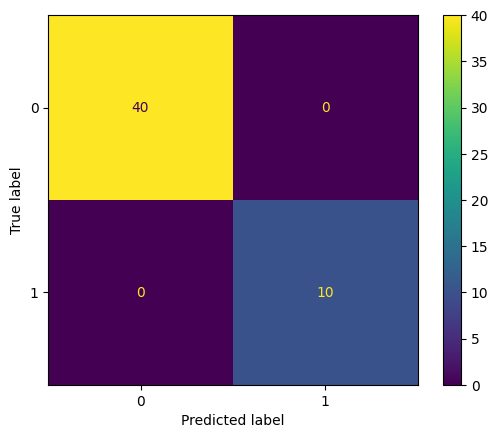

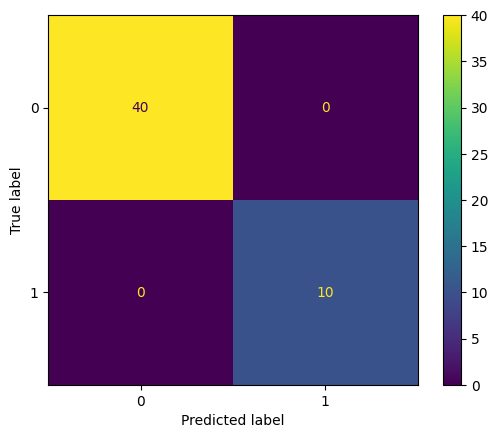

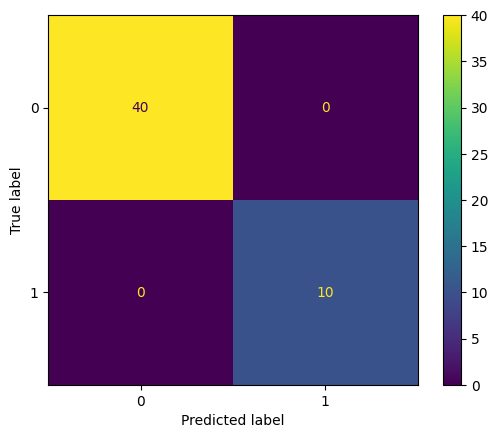

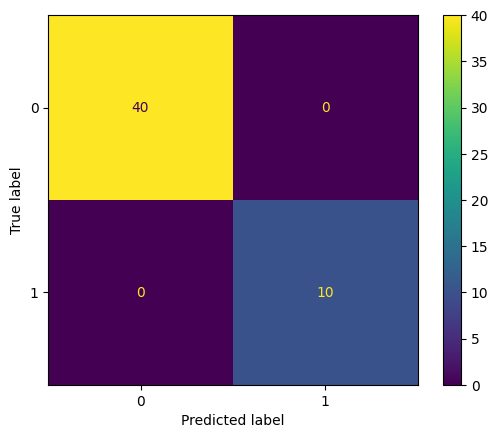

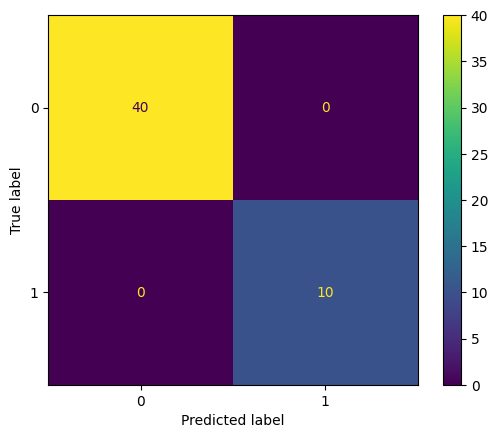

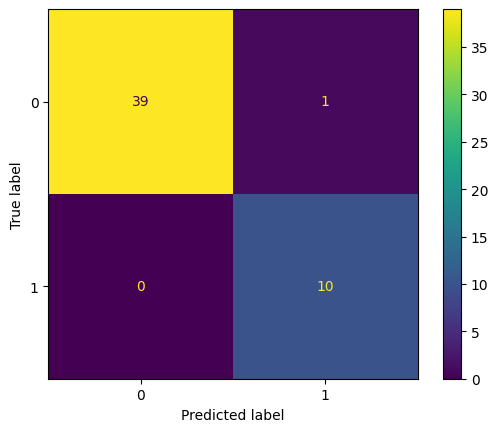

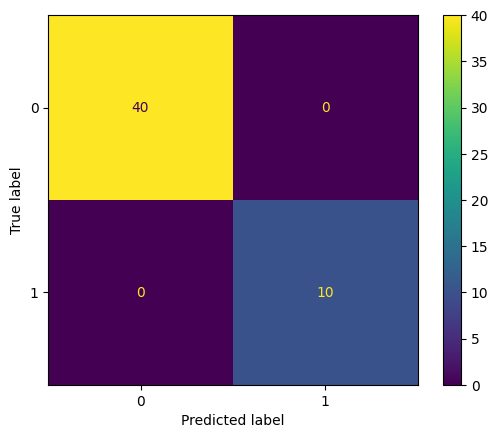

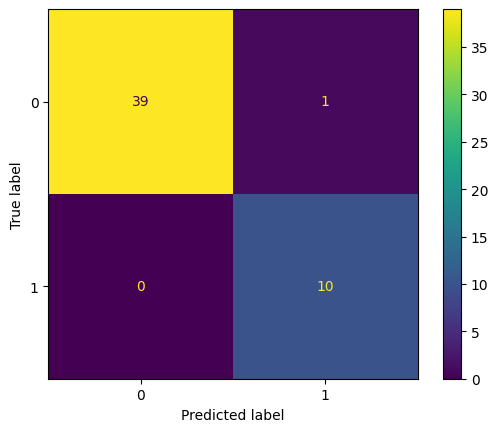

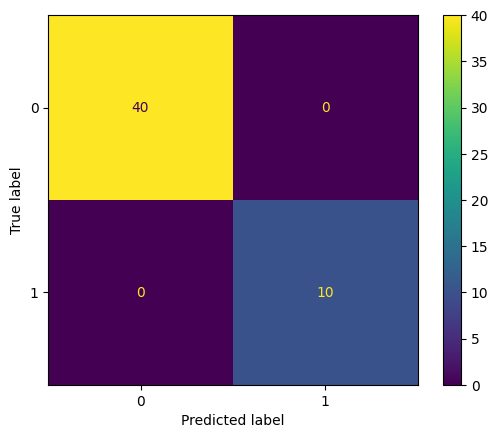

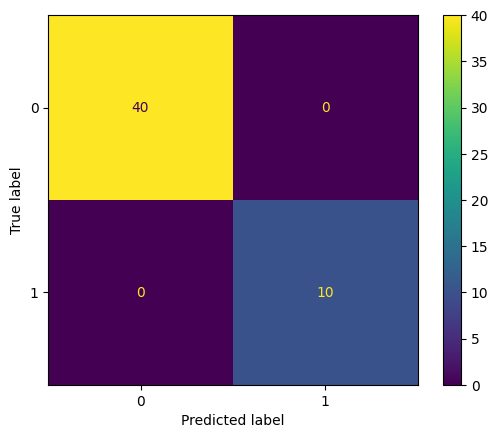

(accuracy     0.996000
 f1           0.996070
 precision    0.996364
 recall       0.996000
 dtype: float64,
    accuracy       f1  precision  recall
 0      1.00  1.00000   1.000000    1.00
 1      1.00  1.00000   1.000000    1.00
 2      1.00  1.00000   1.000000    1.00
 3      1.00  1.00000   1.000000    1.00
 4      1.00  1.00000   1.000000    1.00
 5      0.98  0.98035   0.981818    0.98
 6      1.00  1.00000   1.000000    1.00
 7      0.98  0.98035   0.981818    0.98
 8      1.00  1.00000   1.000000    1.00
 9      1.00  1.00000   1.000000    1.00)

In [ ]:
evaluate_model(xnorm, y, svm_model)